- want cooccurance plots for each MCM
- want want to cluster them etc. see notes
- want them for same MCM but different sizes

In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/classifier/bin/../src/plot.py'>

In [3]:
# lets first load some example MCM
samples_path = "../OUTPUT/sample_sizes"
fname = "MCMs.json"
# sample_sizes = [10,100,500,1000,5421]
# sample_sizes = np.geomspace(10,5421, 10,dtype=int)
sample_sizes = np.append(np.arange(10, 5421, 100), 5421)
samples = {}
for sample_size in sample_sizes:

        with open(os.path.join(samples_path,str(sample_size), fname), "r") as f:
                samples[sample_size] = json.load(f)

In [4]:
sample_sizes

array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110,
       2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210,
       3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310,
       4410, 4510, 4610, 4710, 4810, 4910, 5010, 5110, 5210, 5310, 5410,
       5421])

In [138]:
# Cooccurance matrix for MCM 0
digit = 0
cmap = myplot.cmap_to_gray("Black", reverse=True)
mcm_0 = [myplot.create_cooccurance_matrix(samples[i][digit]) for i in samples]


##### find the rows/pixels that do not have any community members in their community that they will have in the final community

- Note: test MCM is for digit 0



In [137]:
plt.imshow(np.where(mcm_0[0]+mcm_0[-1]!=2, 0,1))
convergence[0]

ValueError: operands could not be broadcast together with shapes (121,121) (2,2) 

In [135]:
convergence = []
for i, mcm_s in enumerate(mcm_0):
    a = mcm_s+mcm_0[-1]
    np.fill_diagonal(a, 0)
    convergence.append(np.where(np.all(a != 2, axis=0))[0])




array([  1,   3,   4,   7,   9,  10,  11,  13,  17,  21,  22,  28,  29,
        33,  34,  43,  44,  46,  48,  50,  55,  57,  59,  62,  87,  88,
        92,  99, 109, 110, 111, 117, 119, 120])

12

Red are pixels that do not have any of the pixels in their group that they have in their final partitioning.


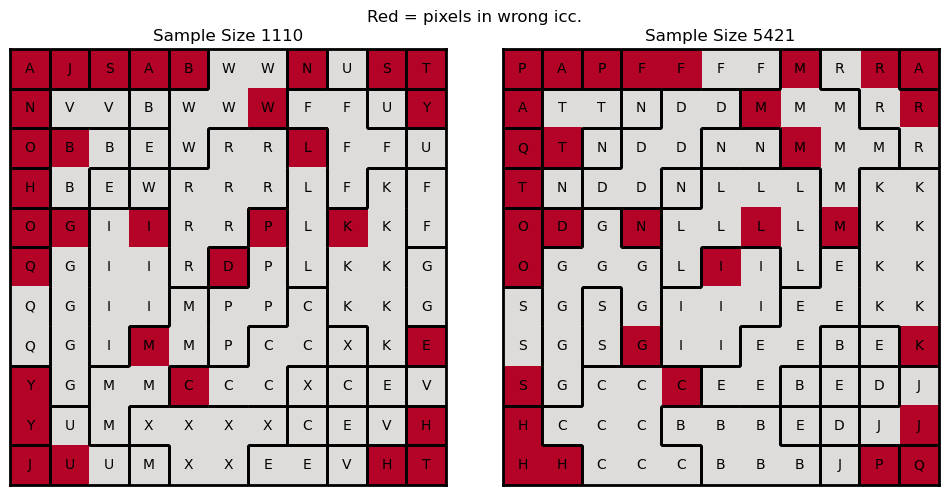

In [151]:
size_smaller = 1110 

wrong_pixels = convergence[np.where(sample_sizes == size_smaller)[0][0]]
val = np.zeros(121)
val[wrong_pixels] = 1
val = val.reshape((11,11))
print("Red are pixels that do not have any of the pixels in their group that they have in their final partitioning.")

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("Red = pixels in wrong icc.")
comms_0 = samples[size_smaller][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[0].set_title(f'Sample Size {size_smaller}')
im = myplot.partition_map(axs[0], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)

comms_0 = samples[5421][0]
comms_0 = myplot.generate_icc_comms_map(comms_0)
axs[1].set_title('Sample Size 5421')
im = myplot.partition_map(axs[1], val, myplot.int_to_letters(comms_0), myplot.find_borders(comms_0), cbar=False)
plt.tight_layout()
plt.show()


Fraction of pixels together in a group that will be in a (possibly differently labeled) group later as well. 
which communities are wrong in the small dataset compared to the big one. They disappear as the sampe sizes get larger.
- in the co-occurance matrix, this means that the row will have not a single overlapping pixel. Then, that grouping means that none of the pixels that are together are correct

#### How far is the partitioning in a smaller sample from the final partitioning in terms of merges and splits?

#### MutInf sample vs. final paritioning

In [17]:
import skimage

single run


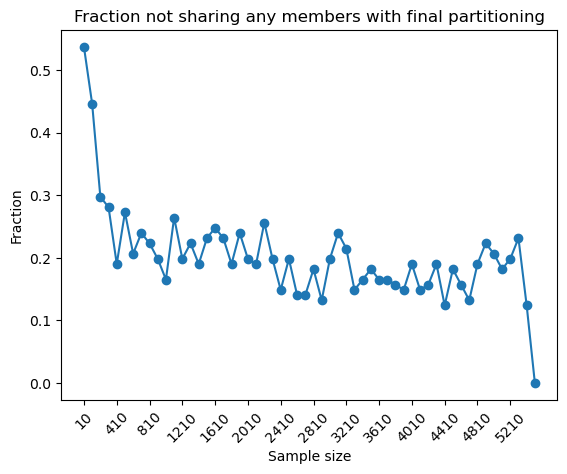

In [96]:

print("single run")
curv = [len(i)/121 for i in convergence]

plt.title("Fraction not sharing any members with final partitioning")
plt.ylabel("Fraction")
plt.xlabel("Sample size")
plt.scatter(np.arange(len(curv)), curv)
plt.plot(curv)
plt.xticks(np.arange(len(curv))[::4], sample_sizes[::4], rotation=45) 
plt.show()

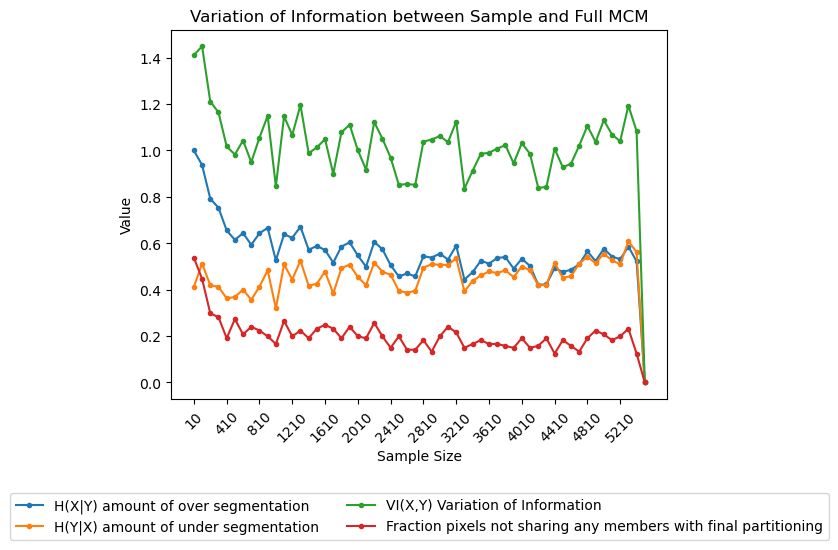

In [105]:

mcm_5421 = myplot.generate_icc_comms_map(samples[5421][0])
variation_of_info = []
for sample_size in samples.keys():
    mcm_sample = myplot.generate_icc_comms_map(samples[sample_size][0])
    variation_of_info.append(skimage.metrics.variation_of_information(mcm_5421,mcm_sample))

variation_of_info = np.array(variation_of_info) / np.max(variation_of_info)

fig, ax = plt.subplots()

ax.plot(variation_of_info, marker=".", label=["H(X|Y) amount of over segmentation","H(Y|X) amount of under segmentation"])
ax.plot(np.sum(variation_of_info,axis=1), label="VI(X,Y) Variation of Information",marker=".")
ax.plot(curv,marker=".", label="Fraction pixels not sharing any members with final partitioning")

ax.set_xlabel('Sample Size')
ax.set_ylabel('Value')
ax.set_title('Variation of Information between Sample and Full MCM')
ax.set_xticks(np.arange(len(curv))[::4])
ax.set_xticklabels(sample_sizes[::4], rotation=45)
ax.legend(ncol=2, loc='lower center', bbox_to_anchor=(0.5, -0.4))
plt.show()


- we can see that over and under segmentation converge, indicating that the size of icc are similar to the final segmentation
- can also see that there is a lot of oversegmentation initially
- assuming final segmentation as ground truth
- this is all only for the MCM 0

##### Would like to know which areas of the image are more robust. Which pixels are more likely to stick together over samples, which are more likly to change icc.

##### Average size of the partition. show bar/error band over iccs 

In [63]:

size_distr = []
for sample_size in samples.keys():
    mcm_sample = myplot.generate_icc_comms_map(samples[sample_size][0])
    _, counts = np.unique(mcm_sample,return_counts=True)
    size_distr.append(counts)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


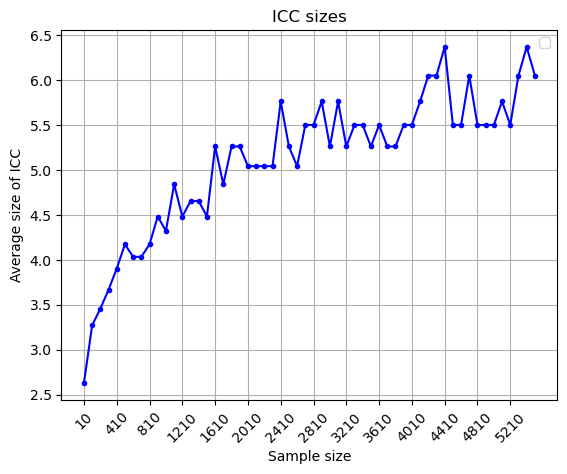

In [86]:
data = size_distr
means = [np.mean(arr) for arr in data]
x = np.arange(len(data))
plt.plot(x, means, marker='.', linestyle='-', color='blue')
# plt.fill_between(x, np.subtract(means, np.max(arr,axis=1)), np.add(means, np.max(arr,axis=1)), alpha=0.2, color='blue', label="±1 std")
plt.xticks(np.arange(len(curv))[::4], sample_sizes[::4], rotation=45) 
plt.xlabel('Sample size')
plt.ylabel('Average size of ICC')
plt.title('ICC sizes')
plt.grid(True)
plt.legend()
plt.show()



------------------------------

In [13]:
raise KeyboardInterrupt

KeyboardInterrupt: 

In [ ]:
test_mcm = test_MCMs[0]
test_mcm = np.genfromtxt(test_mcm,delimiter=1,dtype=int)


idx_pairs = np.argwhere(test_mcm==1).T
cooocurance_matrix = np.zeros((121,121))

cooocurance_matrix[idx_pairs[0],idx_pairs[1]] = 1
cooocurance_matrix[idx_pairs[1],idx_pairs[0]] = 1

plt.imshow(cooocurance_matrix)

mcm = np.array(["11000", "00111"],dtype=str)

mcm

NameError: name 'test_MCMs' is not defined

In [ ]:
# my_sum = myplot.do_cluster(np.sum(mcm_0,axis=0), mcm_0[-1])
# g = sns.clustermap(my_sum, cmap=cmap, linewidth=1,
#                     edgecolor="white", 
#                     dendrogram_ratio=(1e-10,1e-10), # This line 
#                     figsize=(15,15),
#                     xticklabels=False,
#                     yticklabels=False,
#                     row_cluster=False,
#                     col_cluster=False,
#                     cbar=True,
#                     cbar_pos=(0.85, 0.8, 0.07, 0.15)  # Set the colorbar position to the top right corner
#                     )
# # g.ax_row_dendrogram.remove()
# # g.ax_col_dendrogram.remove()
# # g.ax_heatmap.set_facecolor("gray")

# # g.cax.set_visible(False)
# # g.ax_cbar.set_title("")

# comms_test = myplot.do_cluster(mcm_0[-1],mcm_0[-1])
# borders = myplot.find_borders(comms_test)
# myplot.draw_all_borders(borders,ax=g.ax_heatmap,offset=(.5,.5))

# g.ax_cbar.tick_params(axis='x', length=10)
# for spine in g.ax_cbar.spines:
#     g.ax_cbar.spines[spine].set_color('black')
#     g.ax_cbar.spines[spine].set_linewidth(2)

# plt.savefig("../figures/paper_cooccurance.png")
# calcualte overlap between sample cluastering and final clustering
# -> how many are already in the right cluster
# mcm_0


# res = [np.sum(np.logical_and(i, mcm_0[-1])) for i in mcm_0]
# res = [i/np.sum(mcm_0[-1]) for i in res]
# plt.plot(sample_sizes, res)
# plt.xlabel('Sample Size')
# plt.ylabel('% Overlap')
# plt.title("% Overlap in Co-occurance plots with full sample MCM")
# plt.grid(True)
# plt.show()